In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\data_banknote_authentication.zip")
df

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
X = df.iloc[:, :-1].values
X

array([[  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       [  3.4566 ,   9.5228 ,  -4.0112 ,  -3.5944 ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver='adam',max_iter=500,early_stopping=True,validation_fraction=0.1,random_state=42)
model.fit(xtrain,ytrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=500,
              random_state=42)

In [15]:
ypred=model.predict(xtest)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [18]:
cm=confusion_matrix(ytest,ypred)

In [20]:
acc = accuracy_score(ytest,ypred)
pre = precision_score(ytest,ypred)
rec = recall_score(ytest,ypred)
f1 = f1_score(ytest,ypred)
print("Confusion Matrix: ")
print(cm)
print(f"Accuracy :{acc}")
print(f"Precision :{pre}")
print(f"Recall :{rec}")
print(f"F1 Score :{f1}")

Confusion Matrix: 
[[159   0]
 [  6 110]]
Accuracy :0.9781818181818182
Precision :1.0
Recall :0.9482758620689655
F1 Score :0.9734513274336283


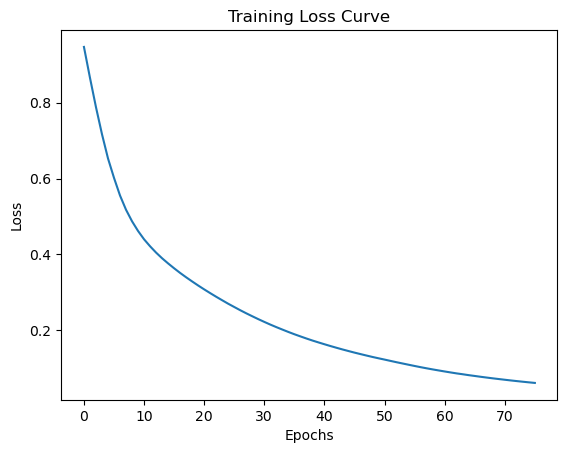

In [22]:
plt.plot(model.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
for act in ['tanh', 'logistic', 'identity']:
    model_alt = MLPClassifier(hidden_layer_sizes=(10,10),
    activation=act,
    solver='adam',
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42)
    model_alt.fit(X_train, y_train)
    ypred_alt = model_alt.predict(X_test)
    print(f"\nActivation: {act}")
    print("Accuracy:", accuracy_score(y_test, y_pred_alt))